In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
!ls "/content/drive/MyDrive/"

'Colab Notebooks'   COS526-Project-main2


In [2]:
cd /content/drive/MyDrive/COS526-Project-main2

/content/drive/.shortcut-targets-by-id/1bT30N2h1zsFJYRACcbscIyg4LTwmMR_I/COS526-Project-main2


In [3]:
project_path = "/content/drive/MyDrive/COS526-Project-main"


In [4]:
ls

 COS526-Project-main/          output/
 createtestdataset.py          output_smoke/
 for_GT/                       pipelineintegrator.py
 for_inputs/                  'Pointcloud - Palabana Sample - TerraVia (1).laz'
 frames_data_full/             prepare_data.py
 Hunyuan3D-2/                  __pycache__/
 nuscenes_data_output/         README.md
 nuscenes_output/              redwood_dataset/
 nuscenes_panoptic_loader.py   shape_completion_pipelinenuscenes.py
 nuScenes-panoptic-v1.0-all/   shape_completion_pipeline.py
 nuscenes_results/             utils/
 nuscenes_setup.py


In [7]:
ls output_smoke/


00468c62078a4a15a86af8dd973c7f45_mesh.ply
25bfb10d641f42d78edd97c1f9849a66_mesh.ply
9248dbad327e4e3da60f9f4fae3cf67c_mesh.ply
dc624a1a06b549918b34553d8d2aff2f_mesh.ply
fc510710c89344f2ae4e886f0d2e4c30_mesh.ply


In [8]:
!pip install nuscenes-devkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 60.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.2 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.5.3-cp311-cp311-linux_x86_64.whl size=11129044 sha256=e51d496f312d7817fd8ebda6374e653de26d6b7cd43467702e4513bcad60cb6e
  Stored in directory: /root/.cache/pip/wheels/5d/3b/87/b850f835f7a97bd28b0fb81fd73bdb17755122ea5ad71484f9
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=83f7921c9c43d4bf85e1e7daae6a3acd2eb72aae40360b92a0fa5595d493ea25
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6

In [5]:
!pip uninstall -y torch torchvision torchaudio xformers

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [6]:
!pip install --no-cache-dir \
    torch==2.2.1+cu118 \
    torchvision==0.17.1+cu118 \
    torchaudio==2.2.1+cu118 \
  -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 183.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 159.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 262.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 294.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 248.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 364.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 238.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 210.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 167.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204

In [ ]:
pip install --no-deps accelerate

In [5]:
!pip install xformers==0.0.25.post1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.6/222.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install --no-deps accelerate

In [7]:
!pip install open3d diffusers rembg hy3dgen transformers

In [19]:
pip install open3d diffusers rembg hy3dgen transformers

In [8]:
import torch, torchvision
from torchvision.ops import nms

print("torch:", torch.__version__, "| cuda available:", torch.cuda.is_available())
print("torchvision:", torchvision.__version__)
print("NMS op loaded:", nms)


RuntimeError: operator torchvision::nms does not exist

In [9]:
# 1) Force NumPy < 2
!pip install --upgrade "numpy<2"


In [10]:
# Cell 2: fix torch/torchvision
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir \
    torch==2.2.1+cu118 \
    torchvision==0.17.1+cu118 \
    torchaudio==2.2.1+cu118 \
    -f https://download.pytorch.org/whl/torch_stable.html
!pip install open3d diffusers rembg hy3dgen xformers accelerate transformers


Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.1+cu118
Uninstalling torchvision-0.17.1+cu118:
  Successfully uninstalled torchvision-0.17.1+cu118
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 300.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 155.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 282.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1+cu118 which is incompatible.


  Using cached torch-2.2.2-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
Using cached torch-2.2.2-cp311-cp311-manylinux1_x86_64.whl (755.6 MB)
ERROR: Operation cancelled by user
^C


In [2]:
!pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.1+cu118
Uninstalling torchvision-0.17.1+cu118:
  Successfully uninstalled torchvision-0.17.1+cu118
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118


In [1]:
!pip install --upgrade --force-reinstall "numpy<2"
!pip install --no-cache-dir \
    torch==2.2.1+cu118 \
    torchvision==0.17.1+cu118 \
    torchaudio==2.2.1+cu118 \
    -f https://download.pytorch.org/whl/torch_stable.html


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1+cu118 which is incompatible.
geopandas 1.0.1 requires shapely>=2.0.0, but you have shapely 1.8.5.post1 which is incompatible.
libpysal 4.13.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
bigframes 2.3.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompat

In [2]:
!pip install -q open3d diffusers rembg hy3dgen xformers accelerate transformers


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu118 requires torch==2.2.1, but you have torch 2.7.0 which is incompatible.
torchvision 0.17.1+cu118 requires torch==2.2.1, but you have torch 2.7.0 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.


In [2]:
import torch, torchvision
from torchvision.ops import nms

print("torch:", torch.__version__, "| cuda:", torch.cuda.is_available())
print("torchvision:", torchvision.__version__)
print("NMS op loaded:", nms)


torch: 2.2.1+cu118 | cuda: True
torchvision: 0.17.1+cu118
NMS op loaded: <function nms at 0x79dcbc6d09a0>


In [4]:
pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: torchvision 0.17.1+cu118
Uninstalling torchvision-0.17.1+cu118:
  Successfully uninstalled torchvision-0.17.1+cu118
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118


In [5]:
pip install --upgrade --force-reinstall "numpy<2"

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.30 requires torch==2.7.0, which is not installed.
peft 0.15.2 requires torch>=1.13.0, which is not installed.
accelerate 1.6.0 requires torch>=2.0.0, which is not installed.
fastai 2.7.19 requires torch<2.7,>=1.10, which is not installed.
fastai 2.7.19 requires torchvision>=0.11, which is not installed.
sentence-transformers 4.1.0 requires torch>=1.11.0, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is inco

In [6]:
!pip install --no-cache-dir \
    torch==2.2.1+cu118 \
    torchvision==0.17.1+cu118 \
    torchaudio==2.2.1+cu118 \
    -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 247.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 184.7 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.3.0
    Uninstalling triton-3.3.0:
      Successfully uninstalled triton-3.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.30 requires torch==2.7.0, but you have torch 2.2.1+cu118 which is incompatible.


In [12]:
import torch, torchvision
from torchvision.ops import nms

print("torch:", torch.__version__, "| cuda:", torch.cuda.is_available())
print("torchvision:", torchvision.__version__)
print("NMS op loaded:", nms)


torch: 2.2.1+cu118 | cuda: True
torchvision: 0.17.1+cu118
NMS op loaded: <function nms at 0x79dcbc6d09a0>


In [5]:
!pip install -q open3d diffusers rembg hy3dgen xformers accelerate transformers


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu118 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.
torchvision 0.17.1+cu118 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.


In [15]:
import open3d, diffusers, rembg, hy3dgen, xformers, transformers
print("All core libs imported OK")


All core libs imported OK


In [11]:
# lightweight smoke-test wrapper for Colab
import os, random
import open3d as o3d
from shape_completion_pipelinenuscenes import run_completion

PARTIAL_DIR = "nuscenes_data_output/point_clouds"
GT_DIR      = "nuscenes_data_output/GT"
MIN_POINTS  = 100
NUM_SAMPLES = 2
OUT_DIR     = "output_smoke"
os.makedirs(OUT_DIR, exist_ok=True)

# gather & filter
pc    = {f[:-4] for f in os.listdir(PARTIAL_DIR) if f.endswith(".ply")}
gt    = {f[:-4] for f in os.listdir(GT_DIR)      if f.endswith(".ply")}
good  = [tok for tok in (pc & gt)
         if len(o3d.io.read_point_cloud(f"{PARTIAL_DIR}/{tok}.ply").points) >= MIN_POINTS]

print(f"Found {len(good)} good tokens, sampling {NUM_SAMPLES}…")
sample = random.sample(good, min(NUM_SAMPLES, len(good)))

# run with minimal settings
for tok in sample:
    cd = run_completion(
        token           = tok,
        output_dir      = OUT_DIR,
        gen_rgb         = False,  # skip ControlNet→RGB
        inpaint_depth   = False,  # skip hole-fill
        inference_steps = 10,     # fewer steps
        seed            = 0
    )
    print(f"{tok} → Chamfer {cd:.3f} mm")


2025-05-10 00:35:30,232 - hy3dgen.shapgen - INFO - Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
INFO:hy3dgen.shapgen:Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
2025-05-10 00:35:30,234 - hy3dgen.shapgen - INFO - Model path not exists, try to download from huggingface
INFO:hy3dgen.shapgen:Model path not exists, try to download from huggingface
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model_fp16.ckpt:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

2025-05-10 00:36:49,411 - hy3dgen.shapgen - INFO - Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors
INFO:hy3dgen.shapgen:Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ xFormers efficient attention enabled
✅ model CPU-offload enabled
Found 4069 good tokens, sampling 2…


Computing visibility with convex hull: 100%|██████████| 1000/1000 [00:00<00:00, 1745.69it/s]


[INFO] Best camera position: [-0.36239935 -1.69489313 -0.998     ]
[INFO] Best visible count: 332
[INFO] Current radius: 1.6817928305074292


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 778.19it/s]


Iteration: 1 Best visible count: 332
[INFO] Current radius: 1.414213562373095


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 927.40it/s]


Iteration: 2 Best visible count: 332
[INFO] Current radius: 1.189207115002721


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 905.21it/s]


Iteration: 3 Best visible count: 332
[INFO] Current radius: 1.0


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 897.92it/s]


Iteration: 4 Best visible count: 332
[INFO] Current radius: 0.8408964152537146


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 655.37it/s]


Iteration: 5 Best visible count: 332
[INFO] Best camera position: [-0.36239935 -1.69489313 -0.998     ]
[INFO] Best visible count: 332


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 142GB/s]
Volume Decoding: 100%|██████████| 7134/7134 [02:24<00:00, 49.40it/s]


25bfb10d641f42d78edd97c1f9849a66 → Chamfer 0.489 mm


Computing visibility with convex hull: 100%|██████████| 1000/1000 [00:01<00:00, 722.31it/s]


[INFO] Best camera position: [-0.72985185 -1.60387041 -0.946     ]
[INFO] Best visible count: 672
[INFO] Current radius: 1.6817928305074292


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 469.66it/s]


[INFO] Best camera position: [ 0.54603714 -1.74981282 -0.79999908]
[INFO] Best visible count: 1512
Iteration: 1 Best visible count: 1512
[INFO] Current radius: 1.414213562373095


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 505.44it/s]


[INFO] Best camera position: [ 1.49229038 -1.27418614 -0.38667699]
[INFO] Best visible count: 1555
Iteration: 2 Best visible count: 1555
[INFO] Current radius: 1.189207115002721


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 489.60it/s]


[INFO] Best camera position: [ 1.39430889 -1.36182056 -0.44871759]
[INFO] Best visible count: 1567
Iteration: 3 Best visible count: 1567
[INFO] Current radius: 1.0


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 455.92it/s]


Iteration: 4 Best visible count: 1567
[INFO] Current radius: 0.8408964152537146


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 451.47it/s]


Iteration: 5 Best visible count: 1567
[INFO] Best camera position: [ 1.39430889 -1.36182056 -0.44871759]
[INFO] Best visible count: 1567


Volume Decoding: 100%|██████████| 7134/7134 [02:23<00:00, 49.84it/s]


fc510710c89344f2ae4e886f0d2e4c30 → Chamfer 0.481 mm


Found these mesh files: ['output_smoke/25bfb10d641f42d78edd97c1f9849a66_mesh.ply', 'output_smoke/fc510710c89344f2ae4e886f0d2e4c30_mesh.ply']
Loading mesh from: output_smoke/25bfb10d641f42d78edd97c1f9849a66_mesh.ply


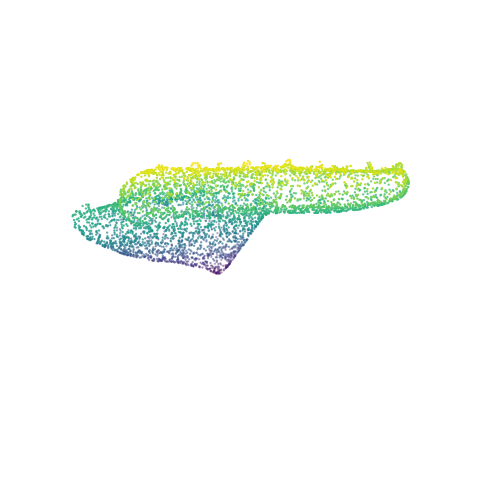

In [20]:
import os, glob
import open3d as o3d

# 1) List exactly what .ply’s are in your folder:
plys = glob.glob("output_smoke/*_mesh.ply")
print("Found these mesh files:", plys)

# 2) Pick one valid path
path = plys[0]
print("Loading mesh from:", path)

# 3) Read it and verify it's non-empty
mesh = o3d.io.read_triangle_mesh(path)
if mesh.is_empty() or len(mesh.triangles) == 0:
    raise RuntimeError(f"Loaded mesh is empty or has no triangles: {path}")

# 4) Sample points and plot via Matplotlib
pcd = mesh.sample_points_uniformly(number_of_points=5000)
pts = np.asarray(pcd.points)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=0.5, c=pts[:,2], cmap='viridis')
ax.view_init(elev=30, azim=45)
ax.set_axis_off()
plt.show()


[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


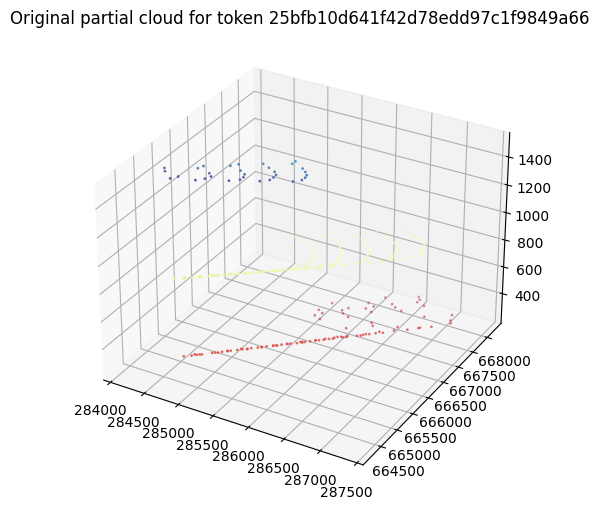

In [14]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# pick your token
token = "25bfb10d641f42d78edd97c1f9849a66"
pcd_path = f"nuscenes_data_output/point_clouds/{token}.ply"

# read & down-sample for speed
pcd = o3d.io.read_point_cloud(pcd_path)
pcd = pcd.voxel_down_sample(voxel_size=0.01)

# if your runtime can pop up an Open3D window:
o3d.visualization.draw_geometries([pcd])

# otherwise fall back to matplotlib:
pts = np.asarray(pcd.points)
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=1, c=pts[:,2], cmap='Spectral')
ax.set_title(f"Original partial cloud for token {token}")
plt.show()


Found mesh files: ['output_smoke/25bfb10d641f42d78edd97c1f9849a66_mesh.ply', 'output_smoke/fc510710c89344f2ae4e886f0d2e4c30_mesh.ply', 'output_smoke/00468c62078a4a15a86af8dd973c7f45_mesh.ply', 'output_smoke/9248dbad327e4e3da60f9f4fae3cf67c_mesh.ply', 'output_smoke/dc624a1a06b549918b34553d8d2aff2f_mesh.ply']

Token: 25bfb10d641f42d78edd97c1f9849a66
  Original has 233 points


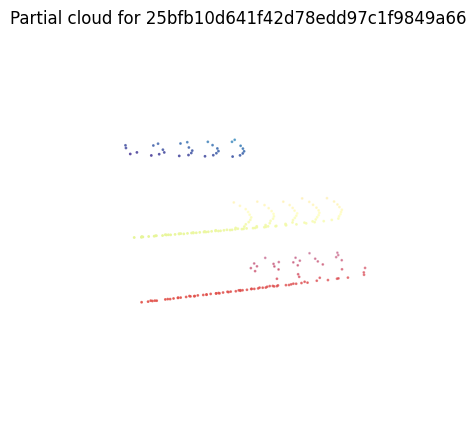


Token: fc510710c89344f2ae4e886f0d2e4c30
  Original has 1716 points


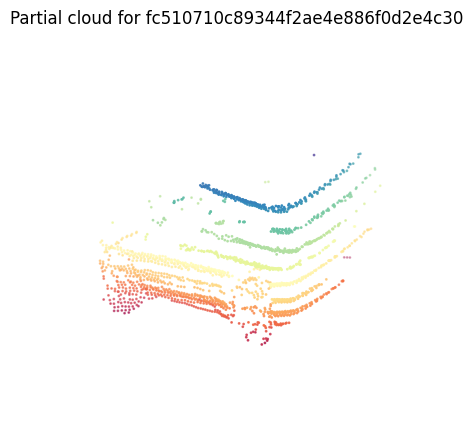


Token: 00468c62078a4a15a86af8dd973c7f45
  Original has 166 points


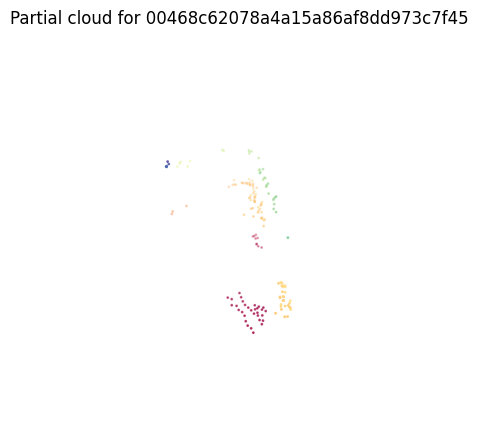


Token: 9248dbad327e4e3da60f9f4fae3cf67c
  Original has 118 points


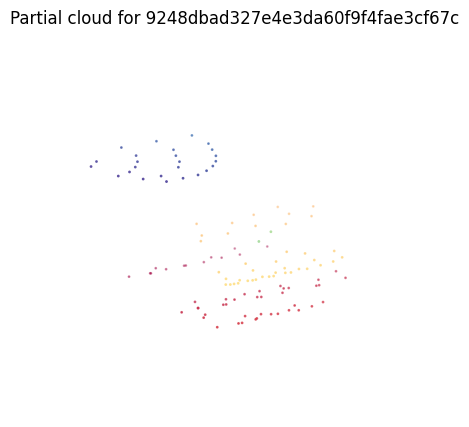


Token: dc624a1a06b549918b34553d8d2aff2f
  Original has 193 points


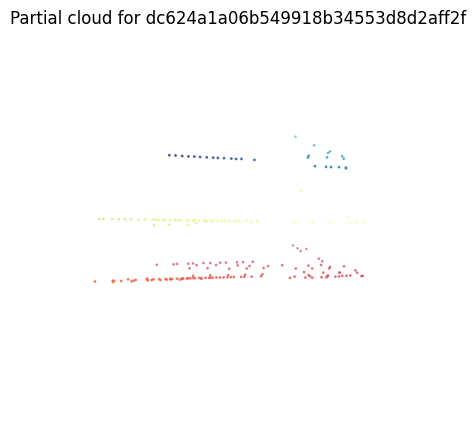

In [15]:
import os, glob
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Find all the completed‐mesh files
mesh_files = glob.glob("output_smoke/*_mesh.ply")
print("Found mesh files:", mesh_files)

for mesh_path in mesh_files:
    # 1) Extract the bare token
    fn = os.path.basename(mesh_path)
    token = fn.replace("_mesh.ply", "")
    print("\nToken:", token)

    # 2) Build path to the **partial** (input) cloud
    partial_pcd_path = f"nuscenes_data_output/point_clouds/{token}.ply"
    if not os.path.exists(partial_pcd_path):
        print("  ✗ no partial cloud at", partial_pcd_path)
        continue

    # 3) Load & down‐sample for speed
    pcd = o3d.io.read_point_cloud(partial_pcd_path)
    print("  Original has", len(pcd.points), "points")
    pcd = pcd.voxel_down_sample(voxel_size=0.02)

    # 4) Plot with matplotlib if Open3D window isn’t available
    pts = np.asarray(pcd.points)
    fig = plt.figure(figsize=(5,5))
    ax  = fig.add_subplot(111, projection='3d')
    ax.scatter(pts[:,0], pts[:,1], pts[:,2],
               c=pts[:,2], cmap="Spectral", s=1)
    ax.set_title(f"Partial cloud for {token}")
    ax.set_axis_off()
    plt.show()


Found these mesh files: ['output_smoke/25bfb10d641f42d78edd97c1f9849a66_mesh.ply', 'output_smoke/fc510710c89344f2ae4e886f0d2e4c30_mesh.ply']
Loading mesh from: output_smoke/fc510710c89344f2ae4e886f0d2e4c30_mesh.ply


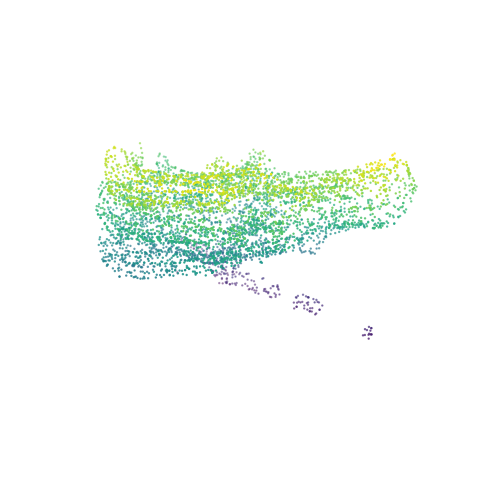

In [26]:
import os, glob
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# 1) List exactly what .ply’s are in your folder:
plys = glob.glob("output_smoke/*_mesh.ply")
print("Found these mesh files:", plys)

# 2) Pick one valid path
path = plys[1]
print("Loading mesh from:", path)

# 3) Read it and verify it's non-empty
mesh = o3d.io.read_triangle_mesh(path)
if mesh.is_empty() or len(mesh.triangles) == 0:
    raise RuntimeError(f"Loaded mesh is empty or has no triangles: {path}")

# 4) Sample points and plot via Matplotlib
pcd = mesh.sample_points_uniformly(number_of_points=5000)
pts = np.asarray(pcd.points)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=0.5, c=pts[:,2], cmap='viridis')
ax.view_init(elev=30, azim=45)
ax.set_axis_off()
plt.show()


[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


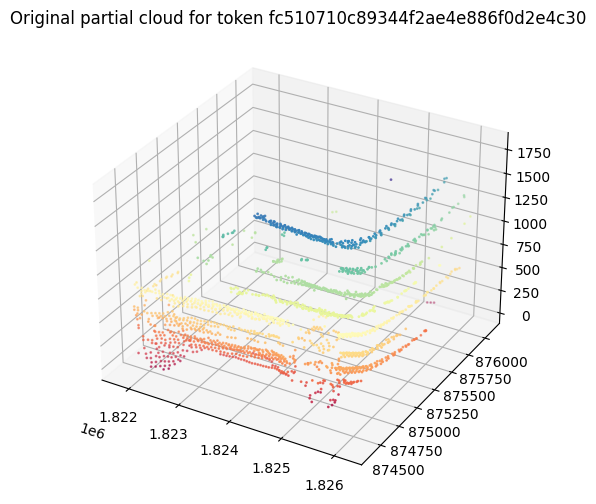

In [25]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# pick your token
token = "fc510710c89344f2ae4e886f0d2e4c30"
pcd_path = f"nuscenes_data_output/point_clouds/{token}.ply"

# read & down-sample for speed
pcd = o3d.io.read_point_cloud(pcd_path)
pcd = pcd.voxel_down_sample(voxel_size=0.01)

# if your runtime can pop up an Open3D window:
o3d.visualization.draw_geometries([pcd])

# otherwise fall back to matplotlib:
pts = np.asarray(pcd.points)
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=1, c=pts[:,2], cmap='Spectral')
ax.set_title(f"Original partial cloud for token {token}")
plt.show()


In [13]:
# 1) Downgrade numpy so your wheels will load
!pip install numpy<2

# 2) Install a matching diffusers + hub combo
!pip install diffusers==0.33.1 huggingface_hub==0.14.1

# 3) Then the rest
!pip install open3d rembg hy3dgen xformers transformers accelerate


/bin/bash: line 1: 2: No such file or directory
  Using cached diffusers-0.33.1-py3-none-any.whl.metadata (19 kB)
INFO: pip is looking at multiple versions of diffusers to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install diffusers==0.33.1 and huggingface_hub==0.14.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested huggingface_hub==0.14.1
    diffusers 0.33.1 depends on huggingface-hub>=0.27.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
  Using cached diffusers-0.33.1-py3-none-any.whl.metadata (19 kB)
  Using cached torch-2.2.2-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
INFO: pip is looking at 

In [2]:
!pip install "numpy<2"


In [8]:
import torch, torchvision
from torchvision.ops import nms
import diffusers, transformers, huggingface_hub, open3d, rembg, hy3dgen, xformers, accelerate

print("torch:           ", torch.__version__, "| cuda:", torch.cuda.is_available())
print("torchvision:     ", torchvision.__version__)
print("diffusers:       ", diffusers.__version__)
print("transformers:    ", transformers.__version__)
print("huggingface_hub: ", huggingface_hub.__version__)
print("NMS op loaded:   ", nms)
print("All core libs imported OK")


torch:            2.2.2+cu121 | cuda: True
torchvision:      0.17.2+cu121
diffusers:        0.33.1
transformers:     4.51.3
huggingface_hub:  0.31.2
NMS op loaded:    <function nms at 0x7a256440c540>
All core libs imported OK


In [12]:
!pip install --upgrade transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.1
    Uninstalling transformers-4.33.1:
      Successfully uninstalled transformers-4.33.1


In [9]:
import os, random
import numpy as np
import open3d as o3d
from shape_completion_pipelinenuscenes import run_completion

PARTIAL_DIR = "nuscenes_data_output/point_clouds"
GT_DIR      = "nuscenes_data_output/GT"
MIN_POINTS  = 100
MAX_DIST    = 5.0     # meters from origin
NUM_SAMPLES = 5
OUT_DIR     = "output_smoke"
os.makedirs(OUT_DIR, exist_ok=True)

# 1) find tokens present in both dirs
pc_files = {f[:-4] for f in os.listdir(PARTIAL_DIR) if f.endswith(".ply")}
gt_files = {f[:-4] for f in os.listdir(GT_DIR)      if f.endswith(".ply")}
common   = pc_files & gt_files

# 2) filter by point count AND centroid distance
good_tokens = []
for tok in common:
    p = o3d.io.read_point_cloud(f"{PARTIAL_DIR}/{tok}.ply")
    if len(p.points) < MIN_POINTS:
        continue
    centroid = np.asarray(p.get_center())
    dist = np.linalg.norm(centroid)        # distance to (0,0,0)
    if dist <= MAX_DIST:
        good_tokens.append((tok, dist))

# 3) optionally sort by ascending distance
good_tokens.sort(key=lambda x: x[1])

print(f"Found {len(good_tokens)} tokens within {MAX_DIST} m, picking {NUM_SAMPLES}")
# grab just the token names
sample = [tok for tok,_ in good_tokens[:NUM_SAMPLES]]

# 4) run your smoke‐test on the closest ones
for tok in sample:
    cd = run_completion(
        token           = tok,
        output_dir      = OUT_DIR,
        gen_rgb         = False,
        inpaint_depth   = False,
        inference_steps = 10,
        seed            = 0,
    )
    print(f"{tok} (dist {dist:.2f} m) → Chamfer {cd:.3f} mm")


2025-05-14 23:06:42,791 - hy3dgen.shapgen - INFO - Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
INFO:hy3dgen.shapgen:Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
2025-05-14 23:06:42,794 - hy3dgen.shapgen - INFO - Model path not exists, try to download from huggingface
INFO:hy3dgen.shapgen:Model path not exists, try to download from huggingface
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

model.ckpt:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

2025-05-14 23:07:58,606 - hy3dgen.shapgen - INFO - Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors
INFO:hy3dgen.shapgen:Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ xFormers efficient attention enabled
✅ model CPU-offload enabled


KeyboardInterrupt: 

In [6]:
# ─── lightweight smoke-test wrapper (closest-by-distance) ─────────────────
import os
import numpy as np
import open3d as o3d
from shape_completion_pipelinenuscenes import run_completion

# ─── Config ────────────────────────────────────────────────────────────────
PARTIAL_DIR = "nuscenes_data_output/point_clouds"
GT_DIR      = "nuscenes_data_output/GT"
OUT_DIR     = "output_smoke"
MIN_POINTS  = 100    # discard tiny clouds
NUM_SAMPLES = 3      # how many nearest tokens to test
os.makedirs(OUT_DIR, exist_ok=True)

# ─── 1) collect tokens present in both dirs & above point threshold
pc_tokens = {f[:-4] for f in os.listdir(PARTIAL_DIR) if f.endswith(".ply")}
gt_tokens = {f[:-4] for f in os.listdir(GT_DIR)      if f.endswith(".ply")}
common    = pc_tokens & gt_tokens

good = []
for tok in common:
    pcd = o3d.io.read_point_cloud(f"{PARTIAL_DIR}/{tok}.ply")
    if len(pcd.points) >= MIN_POINTS:
        centroid = np.asarray(pcd.get_center())
        dist     = np.linalg.norm(centroid)  # distance to origin
        good.append((tok, dist))

if not good:
    raise RuntimeError("No token passed the MIN_POINTS filter")

# ─── 2) pick the ones with smallest centroid distance
good.sort(key=lambda x: x[1])
sample = [tok for tok, _ in good[:NUM_SAMPLES]]
print(f"Testing these {len(sample)} closest tokens:", sample)

# ─── 3) run the pipeline on those with minimal settings
for tok in sample:
    cd = run_completion(
        token           = tok,
        output_dir      = OUT_DIR,
        gen_rgb         = False,  # skip heavy ControlNet→RGB
        inpaint_depth   = False,  # skip hole-filling
        inference_steps = 10,     # fewer diffusion steps
        seed            = 0
    )
    print(f"{tok} → Chamfer distance {cd:.3f} mm")


2025-05-15 00:20:10,027 - hy3dgen.shapgen - INFO - Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
INFO:hy3dgen.shapgen:Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
2025-05-15 00:20:10,032 - hy3dgen.shapgen - INFO - Model path not exists, try to download from huggingface
INFO:hy3dgen.shapgen:Model path not exists, try to download from huggingface
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

2025-05-15 00:20:10,948 - hy3dgen.shapgen - INFO - Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors
INFO:hy3dgen.shapgen:Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


✅ xFormers efficient attention enabled
✅ model CPU-offload enabled
Testing these 3 closest tokens: ['00468c62078a4a15a86af8dd973c7f45', '9248dbad327e4e3da60f9f4fae3cf67c', 'dc624a1a06b549918b34553d8d2aff2f']


Computing visibility with convex hull: 100%|██████████| 1000/1000 [00:00<00:00, 2716.19it/s]


[INFO] Best camera position: [-0.48161422 -0.6586135  -1.826     ]
[INFO] Best visible count: 138
[INFO] Current radius: 1.6817928305074292


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 766.15it/s]


[INFO] Best camera position: [ 0.34092744 -0.29056711 -1.94918938]
[INFO] Best visible count: 162
Iteration: 1 Best visible count: 162
[INFO] Current radius: 1.414213562373095


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 1016.72it/s]


Iteration: 2 Best visible count: 162
[INFO] Current radius: 1.189207115002721


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 1023.07it/s]


Iteration: 3 Best visible count: 162
[INFO] Current radius: 1.0


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 880.54it/s]


Iteration: 4 Best visible count: 162
[INFO] Current radius: 0.8408964152537146


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 916.95it/s]


[INFO] Best camera position: [-0.21401855 -0.25404806 -1.97222099]
[INFO] Best visible count: 163
Iteration: 5 Best visible count: 163
[INFO] Current radius: 0.7071067811865475


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 941.30it/s]


Iteration: 6 Best visible count: 163
[INFO] Best camera position: [-0.21401855 -0.25404806 -1.97222099]
[INFO] Best visible count: 163


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 148GB/s]
Volume Decoding: 100%|██████████| 7134/7134 [02:23<00:00, 49.59it/s]


00468c62078a4a15a86af8dd973c7f45 → Chamfer distance 0.532 mm


Computing visibility with convex hull: 100%|██████████| 1000/1000 [00:00<00:00, 1845.35it/s]


[INFO] Best camera position: [-0.07000909 -1.54343731 -1.27      ]
[INFO] Best visible count: 180
[INFO] Current radius: 1.6817928305074292


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 717.89it/s]


Iteration: 1 Best visible count: 180
[INFO] Current radius: 1.414213562373095


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 716.86it/s]


Iteration: 2 Best visible count: 180
[INFO] Current radius: 1.189207115002721


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 693.42it/s]


Iteration: 3 Best visible count: 180
[INFO] Current radius: 1.0


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 733.53it/s]


Iteration: 4 Best visible count: 180
[INFO] Current radius: 0.8408964152537146


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 671.21it/s]


Iteration: 5 Best visible count: 180
[INFO] Best camera position: [-0.07000909 -1.54343731 -1.27      ]
[INFO] Best visible count: 180


Volume Decoding: 100%|██████████| 7134/7134 [02:23<00:00, 49.89it/s]


9248dbad327e4e3da60f9f4fae3cf67c → Chamfer distance 0.623 mm


Computing visibility with convex hull: 100%|██████████| 1000/1000 [00:00<00:00, 2175.90it/s]


[INFO] Best camera position: [-0.53521156 -1.90571577 -0.286     ]
[INFO] Best visible count: 362
[INFO] Current radius: 1.6817928305074292


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 984.59it/s]


Iteration: 1 Best visible count: 362
[INFO] Current radius: 1.414213562373095


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 826.37it/s]


Iteration: 2 Best visible count: 362
[INFO] Current radius: 1.189207115002721


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 931.36it/s]


Iteration: 3 Best visible count: 362
[INFO] Current radius: 1.0


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 967.16it/s]


Iteration: 4 Best visible count: 362
[INFO] Current radius: 0.8408964152537146


Computing visibility with depth map: 100%|██████████| 100/100 [00:00<00:00, 895.36it/s]


Iteration: 5 Best visible count: 362
[INFO] Best camera position: [-0.53521156 -1.90571577 -0.286     ]
[INFO] Best visible count: 362


Volume Decoding: 100%|██████████| 7134/7134 [02:22<00:00, 49.90it/s]


dc624a1a06b549918b34553d8d2aff2f → Chamfer distance 0.490 mm


In [9]:
# 1. Uninstall conflicting HF hub & diffusers
!pip uninstall -y huggingface_hub diffusers



Found existing installation: huggingface-hub 0.31.1
Uninstalling huggingface-hub-0.31.1:
  Successfully uninstalled huggingface-hub-0.31.1
Found existing installation: diffusers 0.20.1
Uninstalling diffusers-0.20.1:
  Successfully uninstalled diffusers-0.20.1


In [10]:

# 2. Re-install matching versions
!pip install -q \
    huggingface_hub==0.13.4 \
    diffusers==0.33.1

ERROR: Cannot install diffusers==0.33.1 and huggingface_hub==0.13.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [1]:
!pip uninstall -y torch torchvision torchaudio diffusers transformers


Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.1+cu118
Uninstalling torchvision-0.17.1+cu118:
  Successfully uninstalled torchvision-0.17.1+cu118
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118
Found existing installation: diffusers 0.33.1
Uninstalling diffusers-0.33.1:
  Successfully uninstalled diffusers-0.33.1
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3


In [2]:
!pip install --no-cache-dir \
    torch==2.2.1+cu118 \
    torchvision==0.17.1+cu118 \
    torchaudio==2.2.1+cu118 \
    -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 232.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 274.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.15.2 requires transformers, which is not installed.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, which is not installed.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1+cu118 which is incompatible.


In [3]:
!pip install \
    diffusers==0.20.1 \
    transformers==4.33.1 \
    xformers \
    open3d \
    rembg \
    hy3dgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 4.6 MB/s eta 0:00:00
  Using cached torch-2.2.2-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
INFO: pip is looking at multiple versions of hy3dgen to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.2 MB/s eta 0:00:00
Using cached torch-2.2.2-cp311-cp311-manylinux1_x86_64.whl (755.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 632.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━

In [1]:
import torch, torchvision
from torchvision.ops import nms
import diffusers, transformers
print(torch.__version__, torchvision.__version__,
      transformers.__version__, diffusers.__version__)


AttributeError: type object 'torch._C.Tag' has no attribute 'needs_fixed_stride_order'

In [2]:
!pip uninstall -y torchao


Found existing installation: torchao 0.10.0
Uninstalling torchao-0.10.0:
  Successfully uninstalled torchao-0.10.0


In [3]:
!pip install --no-cache-dir torchaudio==2.2.1+cu118 \
  -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 GB 162.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 MB 257.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1+rocm5.7 which is incompatible.
torchvision 0.17.2 requires torch==2.2.2, but you have torch 2.2.1+rocm5.7 which is incompatible.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.33.1 which is incompatible.


In [2]:
!pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.2.1+rocm5.7
Uninstalling torch-2.2.1+rocm5.7:
  Successfully uninstalled torch-2.2.1+rocm5.7
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118


In [3]:
!pip install --no-cache-dir \
  torch==2.2.1+cu118 \
  torchvision==0.17.1+cu118 \
  torchaudio==2.2.1+cu118 \
  -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 234.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 155.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 180.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1+cu118 which is incompatible.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.33.1 which is incompatible.


In [1]:
import torch, torchvision
from torchvision.ops import nms

print(torch.__version__, torchvision.__version__)
print("NMS op loaded:", nms)


2.2.1+cu118 0.17.1+cu118
NMS op loaded: <function nms at 0x7e9175138360>


In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# pick your token
token = "25bfb10d641f42d78edd97c1f9849a66"
pcd_path = f"nuscenes_data_output/point_clouds/{token}.ply"

# read & down-sample for speed
pcd = o3d.io.read_point_cloud(pcd_path)
pcd = pcd.voxel_down_sample(voxel_size=0.01)

# if your runtime can pop up an Open3D window:
o3d.visualization.draw_geometries([pcd])

# otherwise fall back to matplotlib:
pts = np.asarray(pcd.points)
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(pts[:,0], pts[:,1], pts[:,2], s=1, c=pts[:,2], cmap='Spectral')
ax.set_title(f"Original partial cloud for token {token}")
plt.show()


In [2]:
!ls -R .


.:
sample_data

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [3]:
!ls /content/drive/MyDrive/COS526-Project-main/output


ls: cannot access '/content/drive/MyDrive/COS526-Project-main/output': No such file or directory


In [2]:
!pip uninstall -y torch torchvision torchaudio xformers

Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.1+cu118
Uninstalling torchvision-0.17.1+cu118:
  Successfully uninstalled torchvision-0.17.1+cu118
Found existing installation: torchaudio 2.2.1+cu118
Uninstalling torchaudio-2.2.1+cu118:
  Successfully uninstalled torchaudio-2.2.1+cu118
Found existing installation: xformers 0.0.25.post1
Uninstalling xformers-0.0.25.post1:
  Successfully uninstalled xformers-0.0.25.post1


In [8]:
!pip install --no-cache-dir \
    torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 237.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.1 which is incompatible.


In [1]:
!pip install --no-cache-dir \
    open3d diffusers rembg hy3dgen transformers accelerate

In [ ]:
from shape_completion_pipelinenuscenes import run_completion
import os, random
import open3d as o3d

PARTIAL_DIR = "nuscenes_data_output/point_clouds"
GT_DIR      = "nuscenes_data_output/GT"
MIN_POINTS  = 100

# filter tokens
common = set(os.listdir(PARTIAL_DIR)) & set(os.listdir(GT_DIR))
good   = [t[:-4] for t in common if t.endswith(".ply")
          and len(o3d.io.read_point_cloud(f"{PARTIAL_DIR}/{t}").points)>=MIN_POINTS]

sample = random.sample(good, min(2, len(good)))
os.makedirs("output", exist_ok=True)

# run on a few examples
for tok in sample:
    cd = run_completion(
        token           = tok,
        output_dir      = "output",
        gen_rgb         = True,
        inpaint_depth   = True,
        inference_steps = 30,
        seed            = 0
    )
    print(f"{tok} → Chamfer {cd:.3f} mm")

2025-05-08 03:19:32,504 - hy3dgen.shapgen - INFO - Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
INFO:hy3dgen.shapgen:Try to load model from local path: /root/.cache/hy3dgen/tencent/Hunyuan3D-2/hunyuan3d-dit-v2-0
2025-05-08 03:19:32,508 - hy3dgen.shapgen - INFO - Model path not exists, try to download from huggingface
INFO:hy3dgen.shapgen:Model path not exists, try to download from huggingface
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

2025-05-08 03:19:33,288 - hy3dgen.shapgen - INFO - Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors
INFO:hy3dgen.shapgen:Loading model from /root/.cache/huggingface/hub/models--tencent--Hunyuan3D-2/snapshots/34e28261f71c32975727be8db0eace439a280f82/hunyuan3d-dit-v2-0/model.fp16.safetensors


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


⚠️ xFormers not available — using attention slicing instead
✅ model CPU-offload enabled


In [ ]:
# ─── lightweight smoke-test wrapper for Colab ─────────────────────────────
import os, random
import open3d as o3d
from shape_completion_pipelinenuscenes import run_completion

# 1) paths & thresholds
PARTIAL_DIR = "nuscenes_data_output/point_clouds"
GT_DIR      = "nuscenes_data_output/GT"
MIN_POINTS  = 100
NUM_SAMPLES = 2     # ← keep this small!
OUT_DIR     = "output_smoke"
os.makedirs(OUT_DIR, exist_ok=True)

# 2) gather tokens present in both dirs and ≥MIN_POINTS
pc    = {f[:-4] for f in os.listdir(PARTIAL_DIR) if f.endswith(".ply")}
gt    = {f[:-4] for f in os.listdir(GT_DIR)      if f.endswith(".ply")}
common = pc & gt
good   = [tok for tok in common
          if len(o3d.io.read_point_cloud(f"{PARTIAL_DIR}/{tok}.ply").points) >= MIN_POINTS
          and len(o3d.io.read_point_cloud(f"{GT_DIR}/{tok}.ply").points)     >= MIN_POINTS]

print(f"Found {len(good)} good tokens, sampling {NUM_SAMPLES}…")
sample = random.sample(good, min(NUM_SAMPLES, len(good)))

# 3) run with minimal settings
for tok in sample:
    cd = run_completion(
        token           = tok,
        output_dir      = OUT_DIR,
        gen_rgb         = False,   # skip heavy ControlNet→RGB
        inpaint_depth   = False,   # skip hole-fill
        inference_steps = 10,      # fewer diffusion steps
        seed            = 0
    )
    print(f"{tok} → Chamfer {cd:.3f} mm")
